**Google Play Store**

Google Play, formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for devices running on "Google certified" Android operating system, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs. 

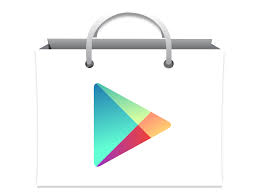

Applications are available through Google Play either free of charge or at a cost. They can be downloaded directly on an Android device through the proprietary Play Store mobile app or by deploying the application to a device from the Google Play website. . The Google Play store had over **82 billion app downloads in 2016** and has reached over 3.5 million apps published in 2017.[1] It has been the subject of multiple issues concerning security, in which malicious software has been approved and uploaded to the store and downloaded by users, with varying degrees of severity.

Google Play was launched on **March 6, 2012**, bringing together Android Market, Google Music, and the Google eBookstore under one brand, marking a shift in Google's digital distribution strategy. The services included in Google Play are Google Play Books, Google Play Games, Google Play Movies & TV and Google Play Music, and formerly Google Play Newsstand before being phased out of Google Play completely in November 2018. Following their re-branding, Google has gradually expanded the geographical support for each of the services


In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input\data.csv
../input\googleplaystore.csv
../input\googleplaystore_user_reviews.csv
../input\test.csv
../input\train.csv


Flow chart for the following set
1. Data cleaning
2. Analysing Content rating (Everyone v/s Teens)
3. Finding famous Categories

In [2]:
df = pd.read_csv("../input/googleplaystore.csv")
df1 = pd.read_csv("../input/googleplaystore_user_reviews.csv")

Data Cleaning
1. To convert Size(string) into integer, by converting all the values into bytes
2. To convert installs into integer
3. Remove the dollar sign from Price
4. To extract month and year from the last updated column

In [3]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

Dealing with null values

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Filling the ratings of null values in ratings with zeros

In [5]:
df["Rating"] = df["Rating"].fillna(0)

In [6]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

Removing rows of handful of null values

In [7]:
df = df.dropna()


All the null values have been successfully removed

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Removing strings from the columns so that it can be converted into numeric values

In [9]:
df['Installs'] = df['Installs'].str.replace('+', '')
# df.Reviews = df.Reviews.apply(lambda x:x.replace('3.0M','3000000'))
df['Price'] = df['Price'].str.replace('$', '')
df['Size'] = df['Size'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Size'] = df['Size'].str.replace('+', '')
# df['Reviews'] = df['Reviews'].str.replace('M', '')

C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [10]:
df['Size']=df['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')
df['Price'] = df["Price"].replace({"Everyone": "0"})
df['Size'].value_counts()
df['Size'] = pd.to_numeric(df['Size'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Price'] = pd.to_numeric(df['Price'])

C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\77338\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Removing the duplicates from App column

In [11]:
# check duplicates
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df = df.drop_duplicates()
df = df.drop_duplicates(subset='App', keep="first")


There are 1181/10829 duplicated records.


In [12]:
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))

There are 0/9648 duplicated records.


In [13]:
new = df["Last Updated"].str.split(" ", n = 1, expand = True) 
df["Month"]= new[0] 
df
df['Year']=df['Last Updated'].apply(lambda x: x[-4::])
df
df = df.drop(['Last Updated'], axis=1)
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews        Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000000.0     10000  Free    0.0       Everyone   
1         3.9      967  14000000.0    500000  Free    0.0       Everyone   
2         4.7    87510   8700000.0   5000000  Free    0.0       Everyone   
3         4.5   215644  25000000.0  50000000  Free    0.0           Teen   
4         4.3      967   2800000.0    100000  Free    0.0       Everyone   
...       ...      ...         ...       ...   ...    ...            ...   
10836     4.5       38  53000000.0      5000  Free    0.0       Everyone   
10837     5.0        4   3600000.0       100  Free    0.0       Everyone   
10838     0.0        3   9500000.0      1000  Free    0.0       Everyone   
10839     4.5      114         0.0      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000000.0  10000000  Free    0.0       Everyone   

                          Genres         Current Ver         Android Ver  \
0                   Art & Design               1.0.0        4.0.3 and up   
1      Art & Design;Pretend Play               2.0.0        4.0.3 and up   
2                   Art & Design               1.2.4        4.0.3 and up   
3                   Art & Design  Varies with device          4.2 and up   
4        Art & Design;Creativity                 1.1          4.4 and up   
...                          ...                 ...                 ...   
10836                  Education                1.48          4.1 and up   
10837                  Education                 1.0          4.1 and up   
10838                    Medical                 1.0          2.2 and up   
10839          Books & Reference  Varies with device  Varies with device   
10840                  Lifestyle  Varies with device  Varies with device   

         Month  Year  
0      January  2018  
1      January  2018  
2       August  2018  
3         June  2018  
4         June  2018  
...        ...   ...  
10836     July  2017  
10837     July  2018  
10838  January  2017  
10839  January  2015  
10840     July  2018  

[9648 rows x 14 columns]

In [14]:
df1 = df1.dropna()
df1

App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads older many agents ..not much owner po...  Positive   
64223  If photos posted portal load, fit purpose. I'm...  Positive   
64226  Dumb app, I wanted post property rent give opt...  Negative   
64227  I property business got link SMS happy perform...  Positive   
64230  Useless app, I searched flats kondapur, Hydera...  Negative   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                1.000000                0.533333  
1                0.250000                0.288462  
3                0.400000                0.875000  
4                1.000000                0.300000  
5                1.000000                0.300000  
...                   ...                     ...  
64222            0.173333                0.486667  
64223            0.225000                0.447222  
64226           -0.287500                0.250000  
64227            0.800000                1.000000  
64230           -0.316667                0.400000  

[37427 rows x 5 columns]

In [15]:
df['Content Rating'].value_counts()

Everyone           7893
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Studying Content Rating

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

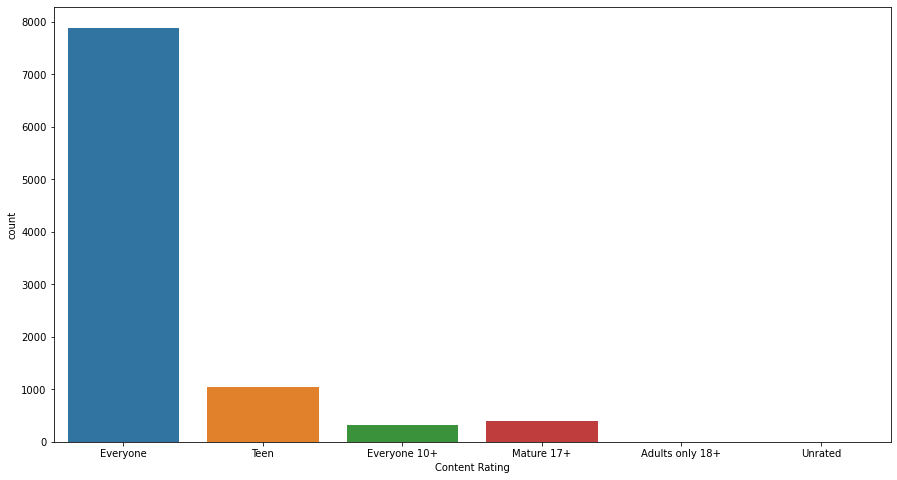

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn import preprocessing
plt.figure(figsize=(15,8))
sns.countplot(x='Content Rating',data = df)

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

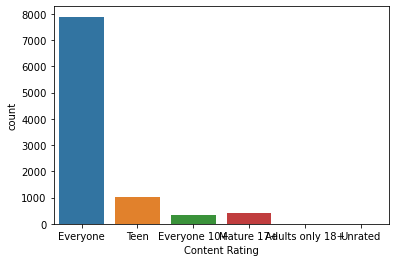

In [17]:
sns.countplot(x='Content Rating',data = df)

In [18]:
df1 = df.groupby(['Type'])['Installs'].sum()
df1

Type
Free    75064046546
Paid       57313871
Name: Installs, dtype: int64

Most Installed Categories for Teens

1. Game
2. Communication
3. Tools

In [19]:
df5 = df.groupby(['Category'])['Installs'].sum()
df5

Category
ART_AND_DESIGN           114333100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1665968576
BUSINESS                 697164865
COMICS                    44981150
COMMUNICATION          11038276251
DATING                   140926107
EDUCATION                352952000
ENTERTAINMENT           2113660000
EVENTS                    15973161
FAMILY                  4427881405
FINANCE                  455348734
FOOD_AND_DRINK           211798751
GAME                   13878924415
HEALTH_AND_FITNESS      1144022512
HOUSE_AND_HOME            97212461
LIBRARIES_AND_DEMO        51995910
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
MEDICAL                   38193177
NEWS_AND_MAGAZINES      2369217760
PARENTING                 31521110
PERSONALIZATION         1532483782
PHOTOGRAPHY             4649147655
PRODUCTIVITY            5793091369
SHOPPING                1400348785
SOCIAL                  5487867902
SPORTS     

Most Installed Categories for Teens
1. Social 
2. Video Player
3. Game 
 

In [20]:
df1 = df.groupby(['Content Rating'])['Installs'].sum()
df1
df3 = df[df['Content Rating'] == 'Teen']
df4 = df3.groupby(['Category'])['Installs'].sum()
df4

Category
ART_AND_DESIGN           60010000
AUTO_AND_VEHICLES        10000000
BEAUTY                     250000
BOOKS_AND_REFERENCE    1433615010
BUSINESS                   102930
COMICS                   28785000
COMMUNICATION           834616650
DATING                    1010910
EDUCATION                 1000000
ENTERTAINMENT          1593510000
EVENTS                    1107110
FAMILY                  870417290
FINANCE                   1112000
FOOD_AND_DRINK           17100610
GAME                   2247012610
HEALTH_AND_FITNESS       27150800
HOUSE_AND_HOME             510000
LIFESTYLE                 8377821
MAPS_AND_NAVIGATION       5100000
MEDICAL                     61110
NEWS_AND_MAGAZINES     1135710110
PARENTING                   50000
PERSONALIZATION         340706326
PHOTOGRAPHY             161507010
PRODUCTIVITY             10002125
SHOPPING                623050200
SOCIAL                 4420462021
SPORTS                  136561600
TOOLS                    60020100
TRAVE

Free v/s Paid for Teens

<AxesSubplot:xlabel='Type', ylabel='count'>

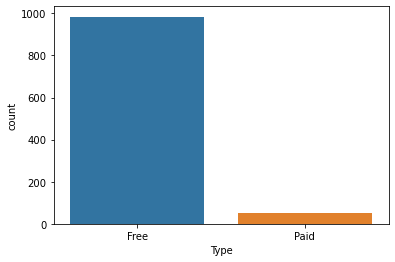

In [21]:
sns.countplot(x='Type',data = df3)

In [22]:
df5 = df3.groupby(['Type'])['Installs'].sum()
df5

Type
Free    16481688463
Paid        5586930
Name: Installs, dtype: int64

Free v/s Paid Everyone

In [23]:
df_everyone = df[df['Content Rating'] == 'Everyone']
df_everyone4 = df_everyone.groupby(['Category'])['Installs'].sum()
df_everyone4

Category
ART_AND_DESIGN            53823100
AUTO_AND_VEHICLES         42130211
BEAUTY                    26717050
BOOKS_AND_REFERENCE      215742566
BUSINESS                 697061830
COMICS                    12476100
COMMUNICATION          10023549591
DATING                     1017396
EDUCATION                328902000
ENTERTAINMENT            486050000
EVENTS                    14764951
FAMILY                  2852629508
FINANCE                  454236734
FOOD_AND_DRINK           194588141
GAME                    8455429545
HEALTH_AND_FITNESS      1112220602
HOUSE_AND_HOME            96702461
LIBRARIES_AND_DEMO        51995910
LIFESTYLE                372628718
MAPS_AND_NAVIGATION      498171790
MEDICAL                   37904257
NEWS_AND_MAGAZINES       106035540
PARENTING                 31371110
PERSONALIZATION         1177546446
PHOTOGRAPHY             4376640645
PRODUCTIVITY            5783083244
SHOPPING                 762198585
SOCIAL                   361774881
SPORTS     

In [24]:
df1 = df.groupby(['Content Rating'])['Installs'].sum()
df1
df4 = df[df['Content Rating'] == 'Everyone']
df4 = df4.groupby(['Category'])['Installs'].sum()
df4

Category
ART_AND_DESIGN            53823100
AUTO_AND_VEHICLES         42130211
BEAUTY                    26717050
BOOKS_AND_REFERENCE      215742566
BUSINESS                 697061830
COMICS                    12476100
COMMUNICATION          10023549591
DATING                     1017396
EDUCATION                328902000
ENTERTAINMENT            486050000
EVENTS                    14764951
FAMILY                  2852629508
FINANCE                  454236734
FOOD_AND_DRINK           194588141
GAME                    8455429545
HEALTH_AND_FITNESS      1112220602
HOUSE_AND_HOME            96702461
LIBRARIES_AND_DEMO        51995910
LIFESTYLE                372628718
MAPS_AND_NAVIGATION      498171790
MEDICAL                   37904257
NEWS_AND_MAGAZINES       106035540
PARENTING                 31371110
PERSONALIZATION         1177546446
PHOTOGRAPHY             4376640645
PRODUCTIVITY            5783083244
SHOPPING                 762198585
SOCIAL                   361774881
SPORTS     

In [25]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews        Size  Installs  Type  Price Content Rating  \
0         4.1      159  19000000.0     10000  Free    0.0       Everyone   
1         3.9      967  14000000.0    500000  Free    0.0       Everyone   
2         4.7    87510   8700000.0   5000000  Free    0.0       Everyone   
3         4.5   215644  25000000.0  50000000  Free    0.0           Teen   
4         4.3      967   2800000.0    100000  Free    0.0       Everyone   
...       ...      ...         ...       ...   ...    ...            ...   
10836     4.5       38  53000000.0      5000  Free    0.0       Everyone   
10837     5.0        4   3600000.0       100  Free    0.0       Everyone   
10838     0.0        3   9500000.0      1000  Free    0.0       Everyone   
10839     4.5      114         0.0      1000  Free    0.0     Mature 17+   
10840     4.5   398307  19000000.0  10000000  Free    0.0       Everyone   

                          Genres         Current Ver         Android Ver  \
0                   Art & Design               1.0.0        4.0.3 and up   
1      Art & Design;Pretend Play               2.0.0        4.0.3 and up   
2                   Art & Design               1.2.4        4.0.3 and up   
3                   Art & Design  Varies with device          4.2 and up   
4        Art & Design;Creativity                 1.1          4.4 and up   
...                          ...                 ...                 ...   
10836                  Education                1.48          4.1 and up   
10837                  Education                 1.0          4.1 and up   
10838                    Medical                 1.0          2.2 and up   
10839          Books & Reference  Varies with device  Varies with device   
10840                  Lifestyle  Varies with device  Varies with device   

         Month  Year  
0      January  2018  
1      January  2018  
2       August  2018  
3         June  2018  
4         June  2018  
...        ...   ...  
10836     July  2017  
10837     July  2018  
10838  January  2017  
10839  January  2015  
10840     July  2018  

[9648 rows x 14 columns]

In [26]:
df['Content Rating'] = labelencoder.fit_transform(df['Content Rating'])


App with the maximum amount of reviews

In [27]:
df.sort_values(by = 'Reviews', ascending = False).iloc[0]

App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                     78158306
Size                               0
Installs                  1000000000
Type                            Free
Price                              0
Content Rating                     4
Genres                        Social
Current Ver       Varies with device
Android Ver       Varies with device
Month                         August
Year                            2018
Name: 2544, dtype: object

In [28]:
df['Category'].value_counts()

FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

FAMOUS CATEGORIES
1. Game
2. Communicaton
3. Tools

In [29]:
df1 = df.groupby(['Category'])['Installs'].sum()
df1

Category
ART_AND_DESIGN           114333100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1665968576
BUSINESS                 697164865
COMICS                    44981150
COMMUNICATION          11038276251
DATING                   140926107
EDUCATION                352952000
ENTERTAINMENT           2113660000
EVENTS                    15973161
FAMILY                  4427881405
FINANCE                  455348734
FOOD_AND_DRINK           211798751
GAME                   13878924415
HEALTH_AND_FITNESS      1144022512
HOUSE_AND_HOME            97212461
LIBRARIES_AND_DEMO        51995910
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
MEDICAL                   38193177
NEWS_AND_MAGAZINES      2369217760
PARENTING                 31521110
PERSONALIZATION         1532483782
PHOTOGRAPHY             4649147655
PRODUCTIVITY            5793091369
SHOPPING                1400348785
SOCIAL                  5487867902
SPORTS     

Same as above but in the form of dictionary

In [30]:
d1=[]
download={}
avg_download={}
for i in df.Category.unique():
    d1=(df[(df.Category == i)].Installs).tolist() 
    if(sum(d1)>0):
        download.update({i:sum(d1)})
        avg_download.update({i:sum(d1)/len(d1)})
total=sum(download.values())
print(download)

{'ART_AND_DESIGN': 114333100, 'AUTO_AND_VEHICLES': 53130211, 'BEAUTY': 27197050, 'BOOKS_AND_REFERENCE': 1665968576, 'BUSINESS': 697164865, 'COMICS': 44981150, 'COMMUNICATION': 11038276251, 'DATING': 140926107, 'EDUCATION': 352952000, 'ENTERTAINMENT': 2113660000, 'EVENTS': 15973161, 'FINANCE': 455348734, 'FOOD_AND_DRINK': 211798751, 'HEALTH_AND_FITNESS': 1144022512, 'HOUSE_AND_HOME': 97212461, 'LIBRARIES_AND_DEMO': 51995910, 'LIFESTYLE': 503823539, 'GAME': 13878924415, 'FAMILY': 4427881405, 'MEDICAL': 38193177, 'SOCIAL': 5487867902, 'SHOPPING': 1400348785, 'PHOTOGRAPHY': 4649147655, 'SPORTS': 1096474498, 'TRAVEL_AND_LOCAL': 2894887146, 'TOOLS': 8001271905, 'PERSONALIZATION': 1532483782, 'PRODUCTIVITY': 5793091369, 'PARENTING': 31521110, 'WEATHER': 361100520, 'VIDEO_PLAYERS': 3926902720, 'NEWS_AND_MAGAZINES': 2369217760, 'MAPS_AND_NAVIGATION': 503281890}


Average Rating of each category

In [31]:
rat={}
avg_rat={}
for i in df.Category.unique():
    d2=(df[(df.Category == i)].Rating).tolist()
    if(sum(d2)>0):
        rat.update({i:sum(d2)})
        avg_rat.update({i:sum(d2)/len(d2)})
print(avg_rat)        

{'ART_AND_DESIGN': 4.168253968253968, 'AUTO_AND_VEHICLES': 3.598823529411765, 'BEAUTY': 3.3905660377358484, 'BOOKS_AND_REFERENCE': 3.3226244343891405, 'BUSINESS': 2.5664285714285717, 'COMICS': 4.032142857142858, 'COMMUNICATION': 3.3495238095238085, 'DATING': 3.1111111111111116, 'EDUCATION': 4.3277310924369745, 'ENTERTAINMENT': 4.135294117647058, 'EVENTS': 3.118750000000001, 'FINANCE': 3.6026086956521755, 'FOOD_AND_DRINK': 3.501785714285714, 'HEALTH_AND_FITNESS': 3.5947916666666666, 'HOUSE_AND_HOME': 3.4770270270270274, 'LIBRARIES_AND_DEMO': 3.1722891566265057, 'LIFESTYLE': 3.339024390243901, 'GAME': 4.0392075078206515, 'FAMILY': 3.6744529540481405, 'MEDICAL': 3.058987341772153, 'SOCIAL': 3.6075313807531364, 'SHOPPING': 3.769306930693071, 'PHOTOGRAPHY': 3.8911032028469745, 'SPORTS': 3.372923076923079, 'TRAVEL_AND_LOCAL': 3.4748858447488584, 'TOOLS': 3.510545454545456, 'PERSONALIZATION': 3.4280748663101637, 'PRODUCTIVITY': 3.3668449197861, 'PARENTING': 3.583333333333334, 'WEATHER': 3.867

Highest Downloads For the year: 2016,2017 & 2018
1. Game
2. Communication
3. Tools

In [32]:
import operator
year_3={}
cc=0
for i in df.Category.unique():
    d3= (df[(df.Category == i) & (df.Year == '2016')].Installs).tolist()
    d4= (df[(df.Category == i) & (df.Year == '2017')].Installs).tolist()
    d5= (df[(df.Category == i) & (df.Year == '2018')].Installs).tolist()
    d6=d3+d4+d5
    if(sum(d6)>0):
        cc=cc+1
        year_3.update({i:sum(d6)})
        cd = sorted(year_3.items(),key=operator.itemgetter(1),reverse=True)

print(cd) 
        

[('GAME', 13594188705), ('COMMUNICATION', 11013164801), ('TOOLS', 7902987935), ('PRODUCTIVITY', 5787352404), ('SOCIAL', 5485504092), ('PHOTOGRAPHY', 4608722545), ('FAMILY', 4276694004), ('VIDEO_PLAYERS', 3895006610), ('TRAVEL_AND_LOCAL', 2893864346), ('NEWS_AND_MAGAZINES', 2367909150), ('ENTERTAINMENT', 2101660000), ('BOOKS_AND_REFERENCE', 1649112716), ('PERSONALIZATION', 1442306232), ('SHOPPING', 1400128685), ('HEALTH_AND_FITNESS', 1142048912), ('SPORTS', 1093581378), ('BUSINESS', 696792065), ('MAPS_AND_NAVIGATION', 503243890), ('LIFESTYLE', 491806079), ('FINANCE', 455072534), ('WEATHER', 356799520), ('EDUCATION', 350622000), ('FOOD_AND_DRINK', 211798751), ('DATING', 140926107), ('ART_AND_DESIGN', 114333100), ('HOUSE_AND_HOME', 92962461), ('AUTO_AND_VEHICLES', 53030211), ('COMICS', 44931150), ('MEDICAL', 37512427), ('LIBRARIES_AND_DEMO', 33895910), ('PARENTING', 31521110), ('BEAUTY', 27197050), ('EVENTS', 15973161)]


Top 5 Most Downloaded Aps
1. GPBooks
2. Messenger
3. Whatsapp
4. Chrome
5. Gmail

In [33]:
d1=[]
download={}
avg_download={}
for i in df.App.unique():
    d1=(df[(df.App == i)].Installs).tolist() 
    if(sum(d1)>0):
        download.update({i:sum(d1)})
        avg_download.update({i:sum(d1)/len(d1)})
        cd = sorted(download.items(),key=operator.itemgetter(1),reverse=True)  
print(cd)

[('Google Play Books', 1000000000), ('Messenger – Text and Video Chat for Free', 1000000000), ('WhatsApp Messenger', 1000000000), ('Google Chrome: Fast & Secure', 1000000000), ('Gmail', 1000000000), ('Hangouts', 1000000000), ('Skype - free IM & video calls', 1000000000), ('Google Play Games', 1000000000), ('Subway Surfers', 1000000000), ('Facebook', 1000000000), ('Instagram', 1000000000), ('Google+', 1000000000), ('Google Photos', 1000000000), ('Maps - Navigate & Explore', 1000000000), ('Google Street View', 1000000000), ('Google', 1000000000), ('Google Drive', 1000000000), ('YouTube', 1000000000), ('Google Play Movies & TV', 1000000000), ('Google News', 1000000000), ('Viber Messenger', 500000000), ('imo free video calls and chat', 500000000), ('Google Duo - High Quality Video Calls', 500000000), ('UC Browser - Fast Download Private & Secure', 500000000), ('LINE: Free Calls & Messages', 500000000), ('Candy Crush Saga', 500000000), ('Temple Run 2', 500000000), ('Pou', 500000000), ('My T

Count max used strings on App

In [34]:
from collections import Counter
results = Counter()
df['App'].str.lower().str.split().apply(results.update)
print(results)


Counter({'-': 1375, '&': 693, 'for': 511, 'free': 374, 'app': 251, 'and': 250, 'the': 239, 'mobile': 204, 'pro': 184, 'video': 159, 'live': 151, 'of': 145, 'by': 143, 'photo': 133, '2018': 127, 'my': 126, 'news': 119, '–': 115, 'theme': 115, 'game': 112, 'chat': 109, 'camera': 105, '3d': 102, 'to': 100, 'calculator': 100, 'games': 98, 'simulator': 96, 'editor': 92, 'manager': 91, 'hd': 87, 'dating': 85, '2': 83, 'with': 82, 'learn': 82, 'online': 81, 'launcher': 79, 'in': 78, 'tracker': 78, 'a': 77, 'tv': 77, 'android': 76, ':': 71, 'wallpapers': 70, 'english': 66, 'car': 65, 'wallpaper': 65, 'kids': 64, 'weather': 62, 'go': 59, 'keyboard': 57, 'remote': 57, 'maker': 55, 'lite': 52, 'number': 51, 'player': 50, 'gps': 50, 'file': 50, 'your': 49, 'real': 49, 'guide': 49, 'text': 48, 'color': 48, 'call': 48, 'browser': 48, 'baby': 48, 'smart': 48, 'dx': 48, 'book': 47, 'i': 47, 'screen': 47, 'best': 46, 'google': 46, 'new': 45, 'er': 45, 'on': 44, '|': 44, 'ag': 44, 'test': 43, 'dr.': 43,

Download and rating any corelation

In [35]:
df.corr()

Rating   Reviews      Size  Installs     Price  \
Rating          1.000000  0.064678  0.099281  0.070539 -0.014394   
Reviews         0.064678  1.000000  0.037805  0.625158 -0.007604   
Size            0.099281  0.037805  1.000000 -0.007581 -0.015095   
Installs        0.070539  0.625158 -0.007581  1.000000 -0.009413   
Price          -0.014394 -0.007604 -0.015095 -0.009413  1.000000   
Content Rating  0.056461  0.055581  0.163195  0.049757 -0.014506   

                Content Rating  
Rating                0.056461  
Reviews               0.055581  
Size                  0.163195  
Installs              0.049757  
Price                -0.014506  
Content Rating        1.000000

There is a .62 co-relation between Reviews and Installs

In [36]:
df1 = pd.read_csv("../input/googleplaystore_user_reviews.csv")
df1

App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                    1.00                0.533333  
1                    0.25                0.288462  
2                     NaN                     NaN  
3                    0.40                0.875000  
4                    1.00                0.300000  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[64295 rows x 5 columns]

In [37]:
df1 = df1.dropna()

Find Total money earned by paid apps

In [38]:
df["Total_money"] = df.Installs*df.Price
df["Total_money"].value_counts()

0.00         8905
29900.00       27
990.00         25
299000.00      23
9.90           23
             ... 
129900.00       1
1400.00         1
699.00          1
28.99           1
3.99            1
Name: Total_money, Length: 230, dtype: int64

In [39]:
df9 = df[(df.Price>0.00)]
df9

App            Category  \
234    TurboScan: scan documents and receipts in PDF            BUSINESS   
235                   Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
427                               Puffin Browser Pro       COMMUNICATION   
476                        Moco+ - Chat, Meet People              DATING   
477                                       Calculator              DATING   
...                                              ...                 ...   
10735                                    FP VoiceBot              FAMILY   
10760                                Fast Tract Diet  HEALTH_AND_FITNESS   
10782                        Trine 2: Complete Story                GAME   
10785                                   sugar, sugar              FAMILY   
10798                           Word Search Tab 1 FR              FAMILY   

       Rating  Reviews        Size  Installs  Type  Price  Content Rating  \
234       4.7    11442   6800000.0    100000  Paid   4.99               1   
235       4.8    10295  39000000.0    100000  Paid   4.99               1   
427       4.0    18247         0.0    100000  Paid   3.99               1   
476       4.2     1545         0.0     10000  Paid   3.99               3   
477       2.6       57   6200000.0      1000  Paid   6.99               1   
...       ...      ...         ...       ...   ...    ...             ...   
10735     0.0       17    157000.0       100  Paid   0.99               3   
10760     4.4       35   2400000.0      1000  Paid   7.99               1   
10782     3.8      252  11000000.0     10000  Paid  16.99               4   
10785     4.2     1405   9500000.0     10000  Paid   1.20               1   
10798     0.0        0   1020000.0        50  Paid   1.04               1   

                 Genres  Current Ver Android Ver     Month  Year  Total_money  
234            Business        1.5.2  4.0 and up     March  2018     499000.0  
235            Business        3.4.6  3.0 and up     April  2017     499000.0  
427       Communication  7.5.3.20547  4.1 and up      July  2018     399000.0  
476              Dating      2.6.139  4.1 and up      June  2018      39900.0  
477              Dating        1.1.6  4.0 and up   October  2017       6990.0  
...                 ...          ...         ...       ...   ...          ...  
10735     Entertainment          1.2  2.1 and up  November  2015         99.0  
10760  Health & Fitness        1.9.3  4.2 and up    August  2018       7990.0  
10782            Action         2.22  5.0 and up  February  2015     169900.0  
10785            Puzzle          2.7  2.3 and up      June  2018      12000.0  
10798            Puzzle          1.1  3.0 and up  February  2012         52.0  

[753 rows x 15 columns]

In [40]:
df9 = df9.sort_values(by=['Total_money'], ascending=False)
df9

App          Category  Rating  \
2241                                     Minecraft            FAMILY     4.5   
5351                                     I am rich         LIFESTYLE     3.8   
5356                             I Am Rich Premium           FINANCE     4.1   
4034                                 Hitman Sniper              GAME     4.6   
7417                 Grand Theft Auto: San Andreas              GAME     4.4   
...                                            ...               ...     ...   
9905                                   Eu sou Rico           FINANCE     0.0   
9917                                   Eu Sou Rico           FINANCE     0.0   
9934             I'm Rich/Eu sou Rico/أنا غني/我很有錢         LIFESTYLE     0.0   
9337                      EG | Explore Folegandros  TRAVEL_AND_LOCAL     0.0   
4465  Popsicle Launcher for Android P 9.0 launcher   PERSONALIZATION     0.0   

      Reviews        Size  Installs  Type   Price  Content Rating  \
2241  2376564         0.0  10000000  Paid    6.99               2   
5351     3547   1800000.0    100000  Paid  399.99               1   
5356     1867   4700000.0     50000  Paid  399.99               1   
4034   408292  29000000.0  10000000  Paid    0.99               3   
7417   348962  26000000.0   1000000  Paid    6.99               3   
...       ...         ...       ...   ...     ...             ...   
9905        0   2600000.0         0  Paid   30.99               1   
9917        0   1400000.0         0  Paid  394.99               1   
9934        0  40000000.0         0  Paid  399.99               1   
9337        0  56000000.0         0  Paid    3.99               1   
4465        0   5500000.0         0  Paid    1.49               1   

                         Genres Current Ver         Android Ver     Month  \
2241  Arcade;Action & Adventure     1.5.2.1  Varies with device      July   
5351                  Lifestyle         2.0        4.0.3 and up   January   
5356                    Finance         1.6          4.0 and up  November   
4034                     Action  1.7.110758          4.1 and up      July   
7417                     Action        1.08          3.0 and up     March   
...                         ...         ...                 ...       ...   
9905                    Finance         1.0          4.0 and up   January   
9917                    Finance         1.0        4.0.3 and up      July   
9934                  Lifestyle       MONEY          4.1 and up  December   
9337             Travel & Local       1.1.1          4.1 and up   January   
4465            Personalization         1.1          4.2 and up      July   

      Year  Total_money  
2241  2018   69900000.0  
5351  2018   39999000.0  
5356  2017   19999500.0  
4034  2018    9900000.0  
7417  2015    6990000.0  
...    ...          ...  
9905  2018          0.0  
9917  2018          0.0  
9934  2017          0.0  
9337  2017          0.0  
4465  2018          0.0  

[753 rows x 15 columns]

Paid Apps
1. Family
2. Lifestyle
3. Game

In [41]:
df10 = df.groupby(['Category'])['Total_money'].sum()
df10

Category
ART_AND_DESIGN         3.184000e+04
AUTO_AND_VEHICLES      1.001485e+05
BEAUTY                 0.000000e+00
BOOKS_AND_REFERENCE    9.022674e+04
BUSINESS               1.050543e+06
COMICS                 0.000000e+00
COMMUNICATION          4.247364e+06
DATING                 4.846150e+04
EDUCATION              2.403980e+06
ENTERTAINMENT          7.980000e+05
EVENTS                 1.099900e+02
FAMILY                 1.136303e+08
FINANCE                2.572668e+07
FOOD_AND_DRINK         2.844000e+05
GAME                   4.068864e+07
HEALTH_AND_FITNESS     1.426069e+06
HOUSE_AND_HOME         0.000000e+00
LIBRARIES_AND_DEMO     9.900000e+01
LIFESTYLE              5.758394e+07
MAPS_AND_NAVIGATION    1.240789e+06
MEDICAL                5.957536e+06
NEWS_AND_MAGAZINES     6.445000e+03
PARENTING              2.499590e+05
PERSONALIZATION        6.795458e+06
PHOTOGRAPHY            8.547768e+06
PRODUCTIVITY           4.313375e+06
SHOPPING               3.014900e+04
SOCIAL             